# Stanford CME 241 (Winter 2024) - Assignment 2

**Due: Jan 22 @ 11:59pm Pacific Time on Gradescope.**

Assignment instructions:
- **Please solve questions 1 and 2, and choose one of questions 3 or 4.**
- Questions 1 and 2 of this homework focus on Markov Processes (MP and MRP) that were taught in class in the second week and are covered in Chapter 3 of the book. 
- Questions 3 and 4 cover Markov Decision Processes that will be taught in the third week and are covered in Chapter 4 of the book.
- Empty code blocks are for your use. Feel free to create more under each section as needed.

Submission instructions:
- When complete, fill out your publicly available GitHub repo file URL below, then export or print this .ipynb file to PDF and upload the PDF to Gradescope.

*Link to this ipynb file in your public GitHub repo (replace below URL with yours):* 

https://github.com/my-username/my-repo/assignment-file-name.ipynb

## Imports

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from rl.markov_process import FiniteMarkovProcess
from rl.markov_process import FiniteMarkovRewardProcess
from rl.distribution import Categorical
from rl.distribution import Choose
from rl.distribution import Constant
from rl.markov_process import NonTerminal
from collections import Counter
from IPython.display import display, Math, Latex

## Question 1
In the classic childhood game of Snakes and Ladders, all players start to the left of square 1 (call this position 0) and roll a 6-sided die to represent the number of squares they can move forward. The goal is to reach square 100 as quickly as possible. Landing on the bottom rung of a ladder allows for an automatic free-pass to climb, e.g. square 4 sends you directly to 14; whereas landing on a snake's head forces one to slide all the way to the tail, e.g. square 34 sends you to 6. Note, this game can be viewed as a Markov Process, where the outcome is only depedent on the current state and not the prior trajectory. In this question, we will ask you to both formally describe the Markov Process that describes this game, followed by coding up a version of the game to get familiar with the RL-book libraries.

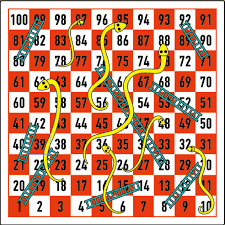

### Part a
Formalize the state space of the Snakes and Ladders game.

In [54]:
display(Math(r'\text{The statespace consists of every square available for a player to be on. There are 100 squares, and thus 100 different states.}'))

<IPython.core.display.Math object>

### Part b
Write out the structure of the transition probabilities. Feel free to abbreviate all squares that do not have a snake or ladder.

In [73]:
display(Math(r'\text{For } 1 \leq i \leq 6 \text{ where } X_t + i \text{ does not have a ladder or snake present, and } X_t<95 \text{, the following transition probability holds:}'))
display(Math(r'P(X_{t+1} = X_t + i) = 1/6'))

display(Math(r'\text{Else, for } 1 \leq i \leq 6 \text{ where } X_t + i \text{ does not have a ladder or snake present, the following transition probability holds:}'))
display(Math(r'P(X_{t+1} = X_t + i) = 1/6 * (X_t - 93)'))

display(Math(r'\text{Else, for } 1 \leq i \leq 6 \text{ where } X_t + i \text{ does have a ladder or snake present, } X_t<95 \text{, and where } *[X_t + i] \text{represents the end location of that snake/ladder, the following transition probability holds:}'))
display(Math(r'P(X_{t+1} = *[X_t + i]) = 1/6'))

display(Math(r'\text{Else, for } 1 \leq i \leq 6 \text{ where } X_t + i \text{ has a ladder or snake present, the following transition probability holds:}'))
display(Math(r'P(X_{t+1} = *[X_t + i]) = 1/6 * (X_t - 93)'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Part c
Code up a `transition_map: Transition[S]` data structure to represent the transition probabilities of the Snakes and Ladders Markov Process so you can model the game as an instance of `FiniteMarkovProcess`. Use the `traces` method to create sampling traces.

In [24]:
ladders = {1:38, 4:14, 8:10, 21:42, 28:74, 50:67, 71:92, 88:99}
snakes = {36:6, 32:10, 48:26, 63:18, 88:24, 95:56, 97:78}

# current_state -> dictionary, potential state -> probability
transition_map = {}

for i in range(100):
    transition_dict = {}
    for j in range(1, 7):
        next_state = i + j
        if next_state in ladders.keys():
            next_state = ladders[next_state]
        elif next_state in snakes.keys():
            next_state = snakes[next_state]
        transition_dict[next_state] = 1/6
    transition_map[i] = Categorical(transition_dict)

# transition_map[100] = Categorical({100:1})
transition_map[99] = Categorical({100:1})
transition_map[98] = Categorical({100:5/6, 99:1/6})
transition_map[97] = Categorical({100:4/6, 99:1/6, 98:1/6})
transition_map[96] = Categorical({100:3/6, 99:1/6, 98:1/6, 78:1/6})
transition_map[95] = Categorical({100:2/6, 99:1/6, 98:1/6, 78:1/6, 96:1/6})
transition_map[94] = Categorical({100:1/6, 99:1/6, 98:1/6, 78:1/6, 96:1/6, 56:1/6})

finite_markov_process_instance = FiniteMarkovProcess(transition_map)
start_dist = Constant(NonTerminal(1))

# generate and print 5 sample traces
num_traces = 5  
for i, trace in enumerate(finite_markov_process_instance.traces(start_dist)):
    trace_list = list(trace)
    print(f"Trace {i+1}: {trace_list}")
    if i >= num_traces - 1:
        break

Trace 1: [NonTerminal(state=1), NonTerminal(state=3), NonTerminal(state=14), NonTerminal(state=15), NonTerminal(state=42), NonTerminal(state=46), NonTerminal(state=51), NonTerminal(state=57), NonTerminal(state=62), NonTerminal(state=65), NonTerminal(state=70), NonTerminal(state=73), NonTerminal(state=74), NonTerminal(state=77), NonTerminal(state=80), NonTerminal(state=81), NonTerminal(state=86), NonTerminal(state=90), NonTerminal(state=96), NonTerminal(state=99), Terminal(state=100)]
Trace 2: [NonTerminal(state=1), NonTerminal(state=14), NonTerminal(state=15), NonTerminal(state=20), NonTerminal(state=25), NonTerminal(state=74), NonTerminal(state=75), NonTerminal(state=80), NonTerminal(state=82), NonTerminal(state=83), NonTerminal(state=89), NonTerminal(state=90), NonTerminal(state=94), NonTerminal(state=78), NonTerminal(state=83), NonTerminal(state=84), NonTerminal(state=86), NonTerminal(state=91), NonTerminal(state=92), NonTerminal(state=96), Terminal(state=100)]
Trace 3: [NonTerminal

### Part d
Plot the sample traces and a graph of the distribution of time steps to finish the game.

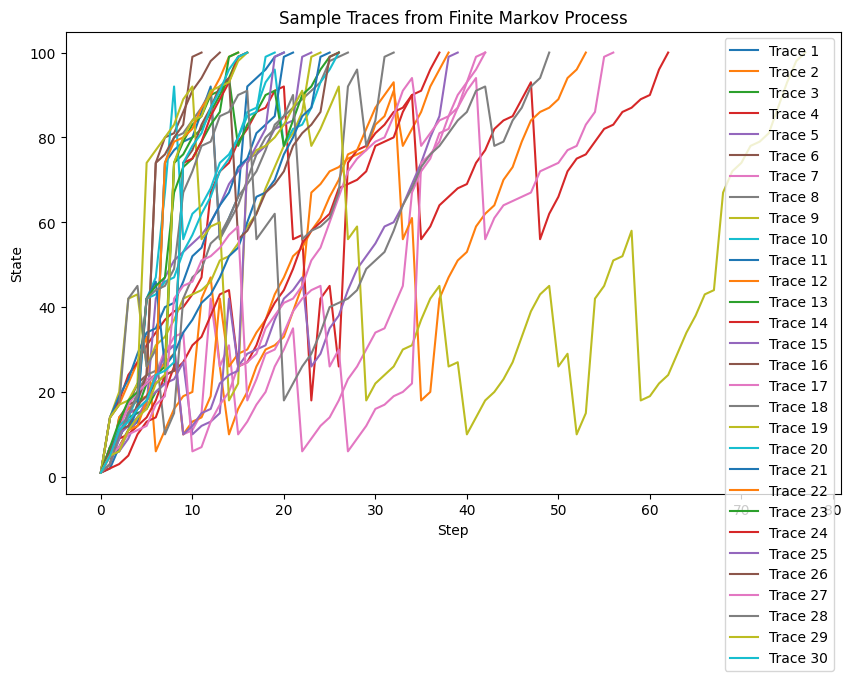

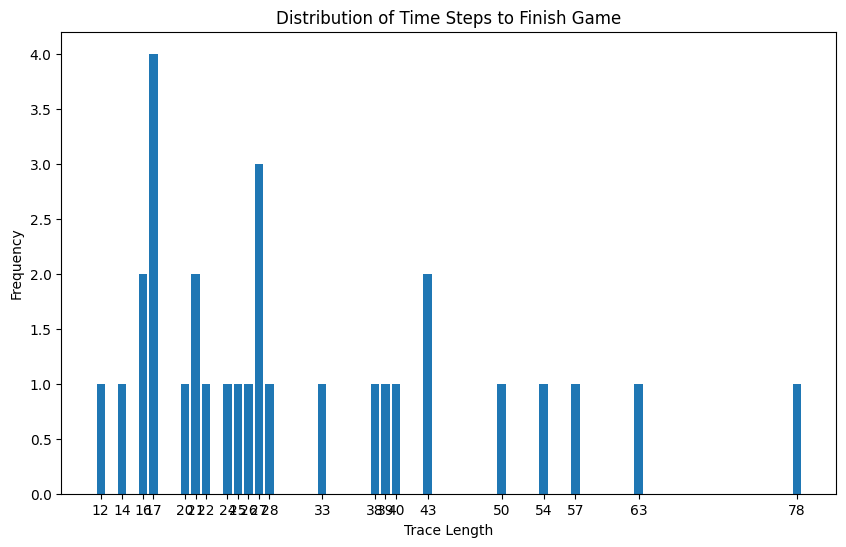

In [38]:
num_traces = 30
traces = [list(trace) for _, trace in zip(range(num_traces), finite_markov_process_instance.traces(start_dist))]
plt.figure(figsize=(10, 6))
for i, trace in enumerate(traces):
    states = [state.state for state in trace]
    plt.plot(states, label=f'Trace {i+1}')
plt.xlabel('Step')
plt.ylabel('State')
plt.title('Sample Traces from Finite Markov Process')
plt.legend()
plt.show()

trace_lengths =  [len(trace) for trace in traces]
length_counts = Counter(trace_lengths)
lengths = list(length_counts.keys())
frequencies = list(length_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(lengths, frequencies)
plt.xlabel('Trace Length')
plt.ylabel('Frequency')
plt.title('Distribution of Time Steps to Finish Game')
plt.xticks(lengths)  # Optional: set x-ticks to be exactly at the trace lengths
plt.show()

### Part e
For the Snakes and Ladders game, calculate the expected number of rolls to finish the game. Hint: in order to calculate this, extend the Snakes and Ladders `FiniteMarkovProcess` to an appropriate `FiniteMarkovRewardProcess` instance. What should be the Rewards model in this MRP so you can use one of the methods in the `FiniteMarkovRewardProcess` class to determine the expected number of dice rolls to finish the game?

In [49]:
transition_reward_map = {}

for key in transition_map.keys():
    new_dict = {}
    for state in transition_map[key].table().keys():
        new_dict[(state, 1)] = transition_map[key].table()[state]
    transition_reward_map[key] = Categorical(new_dict)

finite_markov_reward_process_instance = FiniteMarkovRewardProcess(transition_reward_map)
expected_number_of_steps = finite_markov_reward_process_instance.get_value_function_vec(1)[0]
print(expected_number_of_steps)

29.523357677263668


## Question 2
Consider the problem of a frog jumping across a river with $n=9$ lilypads. The frog at every time step will randomly jump to a position in front of it (e.g. at the starting step, the frog will jump with $\frac{1}{10}$ probability to each of the lilypads or $\frac{1}{10}$ to the other side of the river). A diagram of the frog jumping problem is below.

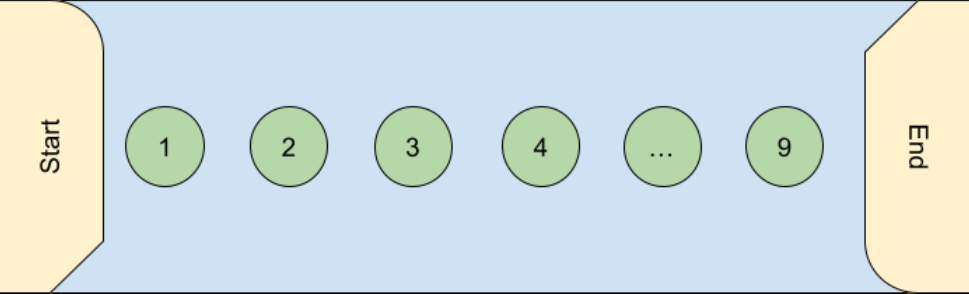

### Part a
Formalize the states of the jumping frog problem as well as the structure of the transition probabilites.

In [109]:
display(Math(r'[ P[X_{n + 1}= X_n + i  | X_n] = {1}/(10 - i) \text{ for } i < 10 '))

<IPython.core.display.Math object>

### Part b
Compute the expected number of steps that it would take for the frog to reach the other side.

In [118]:
display(Math(r'\text{One can establish a recurrence relation. Define (} E_i \text{) to be the expected number of steps from lily \( i \) to the end then}'))
display(Math(r' E_{10} = 0 '))
display(Math(r' E_{9} = 1 '))
display(Math(r'E_i = 1 + \frac{1}{n - i + 1} \sum_{j = i + 1}^{n} E_j '))
display(Math(r'\text{Solving this yields \( E_0 \) to be 2.93.}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Part c
Provide a closed form solution for the expected number of steps / jumps to cross the river for arbitrary $n$. A formal proof is not required. 

In [120]:
display(Math(r'\text{We can observe that for general n, } E_0 \text{ is the partial sum of the harmonic series from 1 to n, } E_0 = \sum_{i=1}^{n} \frac{1}{i}'))

<IPython.core.display.Math object>

## Question 3
Consider an MDP with an infinite set of states $\mathcal{S} = \{1,2,3,\ldots \}$. The start state is $s=1$. Each state $s$ allows a continuous set of actions $a \in [0,1]$. The transition probabilities are given by: $$\mathbb{P}[s+1 \mid s, a] = a, \mathbb{P}[s \mid s, a] = 1 - a \text{ for all } s \in \mathcal{S} \text{ for all } a \in [0,1]$$
For all states $s \in \mathcal{S}$ and actions $a \in [0,1]$, transitioning from $s$ to $s+1$ results in a reward of $1-a$ and transitioning from $s$ to $s$ results in a reward of $1+a$. The discount factor $\gamma=0.5$.

### Part a
Using the MDP Bellman Optimality Equation, calculate the Optimal Value Function $V^*(s)$ for all $s \in \mathcal{S}$

In [84]:
display(Math(r'V^*(S) = max_a\{a * (1-a) + (1-a)*(1+a) + 0.5 * (V^*(S))\}'))
display(Math(r'V^*(S) = max_a\{-2a^2 + a + 1 + 0.5 * V^*(S)\}'))
display(Math(r'0.5*V^*(S) = max_a\{-2a^2 + a + 1\}'))
display(Math(r'\text{Taking derivative of a and setting to 0, we find a is maximized when a=0.25}'))
display(Math(r'0.5*V^*(S) = -2*0.25^2 + 0.25 + 1'))
display(Math(r'V^*(S) = -4*0.25^2 + 0.5 + 2'))
display(Math(r'V^*(S) = 2.25'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Part b
Calculate an Optimal Deterministic Policy $\pi^*(s)$ for all $s \in \mathcal{S}$

In [81]:
display(Math(r'\text{Using the calculations above, we see that a=0.25 maximises our value function, and therefore our optimal strategy should be to always choose a=0.25}'))

<IPython.core.display.Math object>

## Question 4
Consider again the problem of a frog jumping across a river with $n-1$ lilypads, labeled $1, \dots, n-1$, with the two riverbanks labeled positions $0$ and $n$. At each time step, the frog who is at lilypad $i$ has two options:
- (Strategy A) The frog moves to lilypad $i-1$  with probability $\frac{i}{n}$ and moves to lilypad $i+1$ otherwise.
- (Strategy B) The frog moves to arbitrary position from $0,\dots,n$ with equal probability.

The frog now starts on a random lilypad. A snake lives on one end of the river (say the snake lives at 0) and will eat the frog if it lands on this side of the river. The frog can escape by landing the other side of the river (i.e. position $n$). What should the frog's strategy be when on each of the lilypads $1, 2, \ldots, n-1$, in order to maximize the probability of escaping the pond (reaching $n$ before reaching $0$)? Although there are more than one ways of solving this problem, we would like to solve it by modeling it as an MDP and identifying the Optimal Policy.

Note: Sorry for all the frog jumping questions. These games are an easy way to understand Markov Processes, without having to build out too much detail of a financial simulation. Questions will be more related to finance over time.

### Part a
Express with clear mathematical notation the state space, the action space, transition function, and rewards function of an MDP so that the frog-escape problem would be solved by arriving at the Optimal Value Function (and hence, the Optimal Policy) of the MDP.

### Part b
Write code to model this MDP as an instance of the `FiniteMarkovDecisionProcess` class. We have learnt that there exists an optimal deterministic policy, and there are $2^{n-1}$ possible deterministic policies for this problem. Write code to create each of these $2^{n-1}$ deterministic policies (as instances of `FinitePolicy` class), create a policy-implied Finite MRP for each of these deterministic policies (using the `apply_finite_policy` method of `FiniteMarkovDecisionProcess` class), and evaluate the Value Function for each of those implied Finite MRPs (using the `get_value_function_vec` method of `FiniteMarkovRewardProcess` class). This should gives you the Optimal Value Function and the Optimal Deterministic Policy.

### Part c
Plot a graph of the Optimal Escape-Probability and of the associated strategies, as a function of the states of this MDP, for $n=3, n=6$ and $n=9$. By looking at the results on this graph, what pattern do you observe for the optimal policy as you vary $n$ from 3 to 9? 

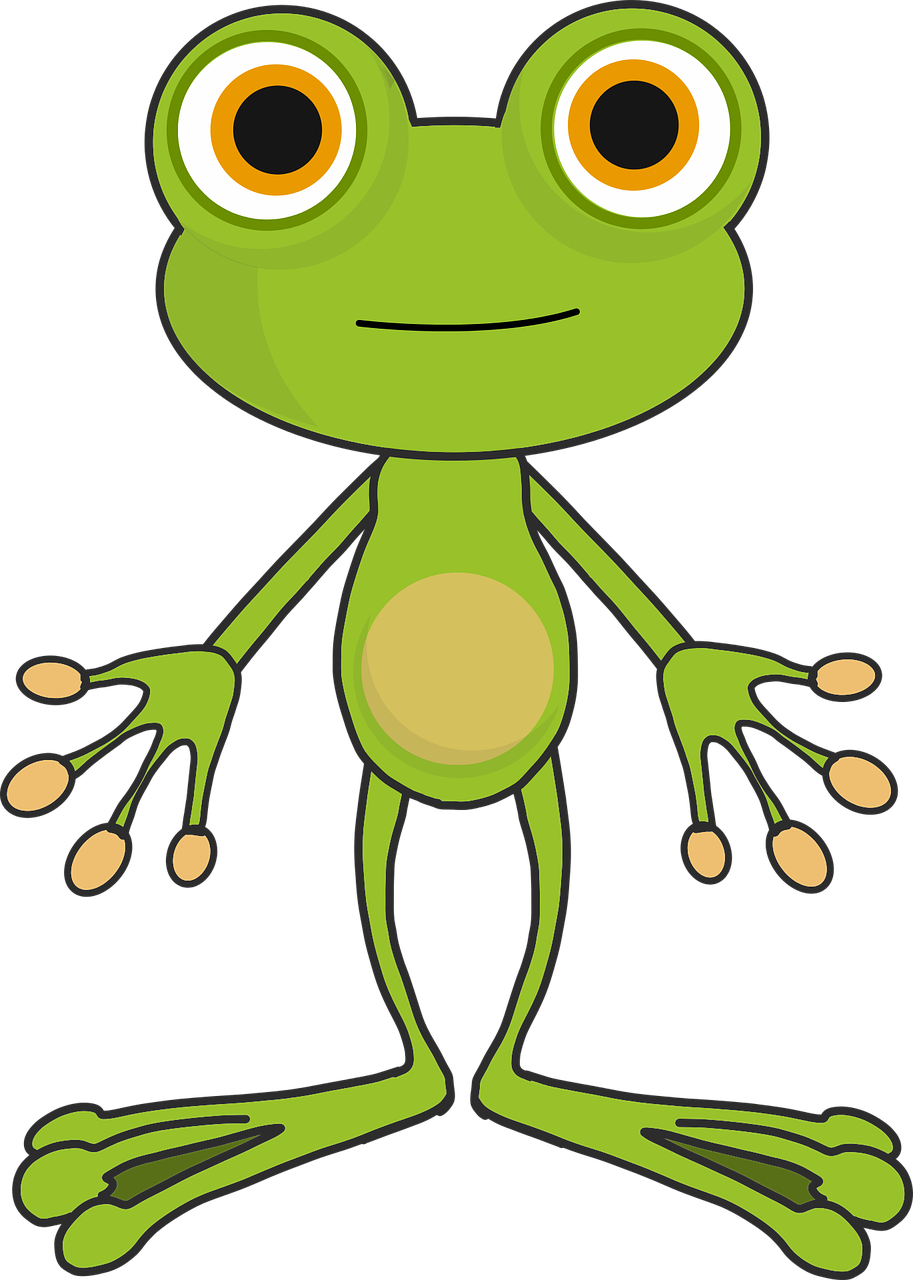